# Regression logistique

## 1.Import les donées et les modules

In [16]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.datasets.mnist as mnist
import time as time
from keras import backend as K

In [17]:
(train_image, train_labels), (test_image, test_labels) = tf.keras.datasets.mnist.load_data()

#### 1.1 Traitement les données

In [18]:
# Normalisation les données de size 0 - 255 en -1 - 1
train_image = (train_image - 127.5)/127.5
test_image = (test_image - 127.5)/127.5 

# Augmenter la dimension du canal 
#train_image = tf.expand_dims(train_image, -1)
#test_image = tf.expand_dims(test_image, -1)
#train_image.shape = ([60000, 28, 28, 1]), train_labels.shape = (60000,)

# Transformation de type 
train_image = tf.cast(train_image, tf.float32)
test_image = tf.cast(test_image, tf.float32)
train_labels = tf.cast(train_labels, tf.int64)
test_labels = tf.cast(test_labels, tf.int64)

#### 1.2 Échantillonnage de la base de données

Pour tenir compte du réseau de classification binaire, nous avons rééchantillonné la base de données en retirant les images égales à 0 ainsi que celles égales à 1 pour reconstituer une nouvelle base de données.

In [19]:
def reconstruire(train_image,train_labels):  
  list_indice = []
  re_train_labels =[]
  for i, value in enumerate(train_labels):
    if value ==0 or value == 1:
      list_indice.append(i)
      re_train_labels.append(value)
  re_train_image = [value for i, value in enumerate(train_image) if i in list_indice]
  return re_train_image, re_train_labels

In [20]:
re_train_image, re_train_labels = reconstruire(train_image,train_labels)

In [21]:
re_test_image, re_test_labels = reconstruire(test_image,test_labels)

In [22]:
re_train_image = tf.cast(re_train_image, tf.float32)
re_test_image = tf.cast(re_test_image, tf.float32)
re_train_labels = tf.cast(re_train_labels, tf.int64)
re_test_labels = tf.cast(re_test_labels, tf.int64)

In [23]:
dataset = tf.data.Dataset.from_tensor_slices((re_train_image, re_train_labels)).shuffle(12665).batch(128)
test_dataset = tf.data.Dataset.from_tensor_slices((re_test_image, re_test_labels)).batch(256)

##2. Entraînement contradictoire avec la pénalité L1



####2.1 Modèle Régression logistique original 

In [24]:
from keras import regularizers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='sigmoid', name='dense_1'),
    tf.keras.layers.Dense(10, activation='sigmoid', name='dense_3')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
optimizer = tf.keras.optimizers.Adam()
loss_func = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='sgd',loss=loss_func,metrics=['acc'])
history = model.fit(dataset, validation_data = test_dataset, epochs=10)

Epoch 1/10
99/99 [==============================] - 1s 6ms/step - loss: 0.4643 - acc: 0.9349 - val_loss: 0.1307 - val_acc: 0.9962
Epoch 2/10
99/99 [==============================] - 0s 4ms/step - loss: 0.0990 - acc: 0.9945 - val_loss: 0.0679 - val_acc: 0.9967
Epoch 3/10
99/99 [==============================] - 0s 4ms/step - loss: 0.0609 - acc: 0.9957 - val_loss: 0.0458 - val_acc: 0.9976
Epoch 4/10
99/99 [==============================] - 0s 4ms/step - loss: 0.0448 - acc: 0.9964 - val_loss: 0.0346 - val_acc: 0.9981
Epoch 5/10
99/99 [==============================] - 0s 5ms/step - loss: 0.0358 - acc: 0.9965 - val_loss: 0.0279 - val_acc: 0.9981
Epoch 6/10
99/99 [==============================] - 0s 4ms/step - loss: 0.0301 - acc: 0.9968 - val_loss: 0.0235 - val_acc: 0.9981
Epoch 7/10
99/99 [==============================] - 0s 4ms/step - loss: 0.0261 - acc: 0.9969 - val_loss: 0.0203 - val_acc: 0.9981
Epoch 8/10
99/99 [==============================] - 0s 5ms/step - loss: 0.0232 - acc: 0.99

####2.2 Modèle régression logistique qui a soustrait la pénalité L1.

In [48]:
model_L1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='sigmoid', name='dense_2'),
    tf.keras.layers.Dense(10, activation='sigmoid', name='dense_3',kernel_regularizer=tf.keras.regularizers.L1(-0.7))
])
model_L1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [49]:
optimizer = tf.keras.optimizers.Adam()
loss_func = tf.keras.losses.SparseCategoricalCrossentropy()
model_L1.compile(optimizer=optimizer,loss=loss_func,metrics=['acc'])
history_L1 = model_L1.fit(dataset,validation_data=test_dataset,epochs=10) 

Epoch 1/20
99/99 [==============================] - 1s 8ms/step - loss: -137.7917 - acc: 0.9734 - val_loss: -182.6703 - val_acc: 0.9976
Epoch 2/20
99/99 [==============================] - 1s 7ms/step - loss: -226.5022 - acc: 0.9979 - val_loss: -271.2878 - val_acc: 0.9986
Epoch 3/20
99/99 [==============================] - 1s 7ms/step - loss: -315.1395 - acc: 0.9982 - val_loss: -359.9415 - val_acc: 0.9991
Epoch 4/20
99/99 [==============================] - 0s 5ms/step - loss: -403.8027 - acc: 0.9991 - val_loss: -448.6105 - val_acc: 0.9991
Epoch 5/20
99/99 [==============================] - 0s 4ms/step - loss: -492.4766 - acc: 0.9994 - val_loss: -537.2886 - val_acc: 0.9991
Epoch 6/20
99/99 [==============================] - 0s 5ms/step - loss: -581.1561 - acc: 0.9988 - val_loss: -625.9705 - val_acc: 0.9991
Epoch 7/20
99/99 [==============================] - 0s 5ms/step - loss: -669.8434 - acc: 0.9996 - val_loss: -714.6586 - val_acc: 0.9991
Epoch 8/20
99/99 [==============================

##3.Implémentation la méthode FGSM(Fast Gradient Sign Method)
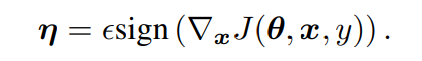

In [42]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label, prediction) # Calculer la fonction de loss
  gradient = tape.gradient(loss, input_image)   # Calculer le gradient
  # Utiliser la fonction signe sur le gradient pour créer une perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [43]:
# Création de la perturbation
perturbations = create_adversarial_pattern(re_test_image, re_test_labels)

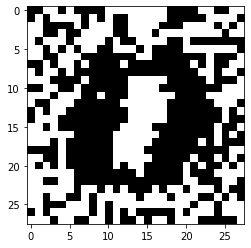

In [44]:
# Vérifier la première perturbation
plt.imshow(perturbations[0],cmap='gray_r')#image en niveaux de gris

##4. Résultat de l'attaque contradictoire et de la défence 

####4.1 Fonction qui sert à afficher les images

In [45]:
def display_images(image, label,adv_label, adv_label_L1, num = 10):
  fig = plt.figure(figsize=(2*num,3))
  for i in range(num):   
      plt.subplot(1,num,i+1) 
      plt.imshow(image[i,:,:],cmap='gray') # + 1)/2) 
      plt.title('{} -> {} -> {}'.format(label[i],adv_label[i],adv_label_L1[i]))
      plt.axis('off')
  plt.show()


####4.2 Afficher les résultats

epsilons = 0:
67/67 [==============================] - 0s 3ms/step


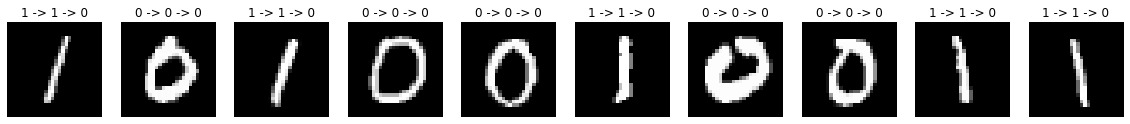

epsilons = 0.05:
67/67 [==============================] - 0s 1ms/step


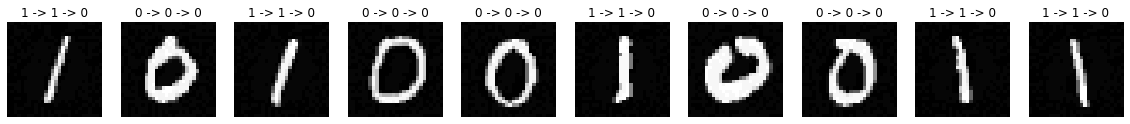

epsilons = 0.1:
67/67 [==============================] - 0s 1ms/step


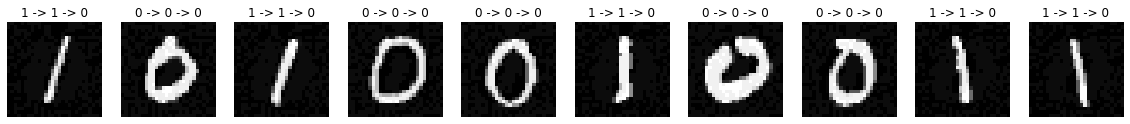

epsilons = 0.15:
67/67 [==============================] - 0s 2ms/step


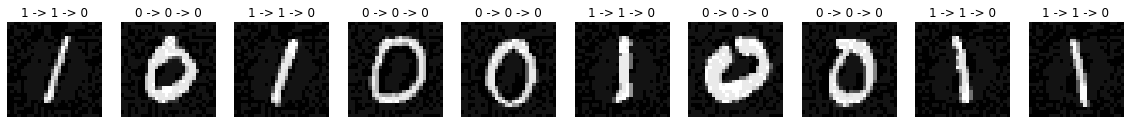

epsilons = 0.2:
67/67 [==============================] - 0s 1ms/step


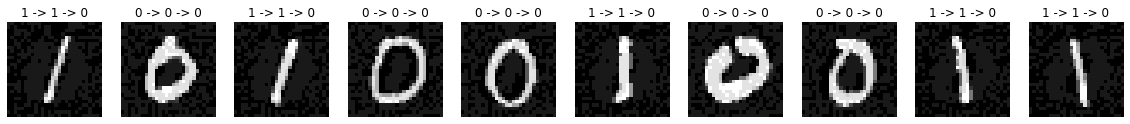

epsilons = 0.25:
67/67 [==============================] - 0s 1ms/step


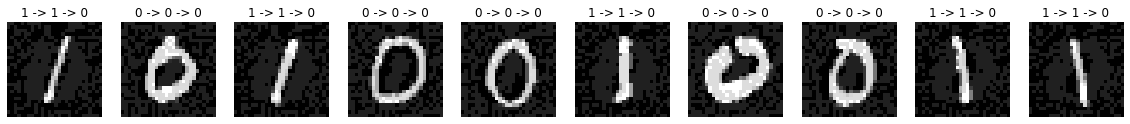

epsilons = 0.3:
67/67 [==============================] - 0s 1ms/step


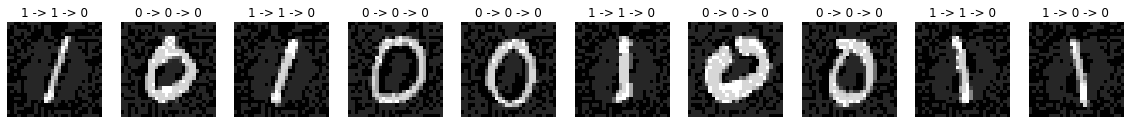

epsilons = 0.35:
67/67 [==============================] - 0s 2ms/step


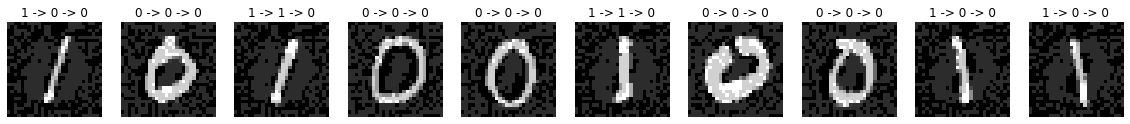

epsilons = 0.4:
67/67 [==============================] - 0s 1ms/step


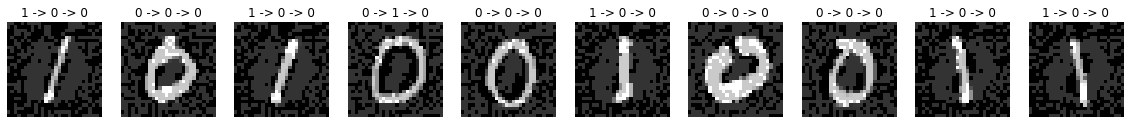

epsilons = 0.45:
67/67 [==============================] - 0s 2ms/step


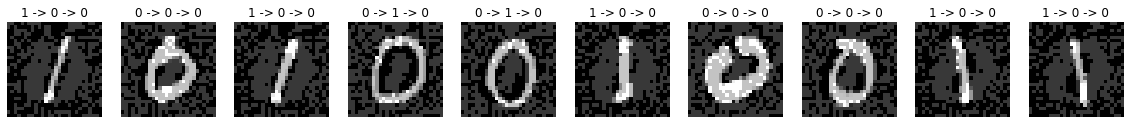

epsilons = 0.5:
67/67 [==============================] - 0s 2ms/step


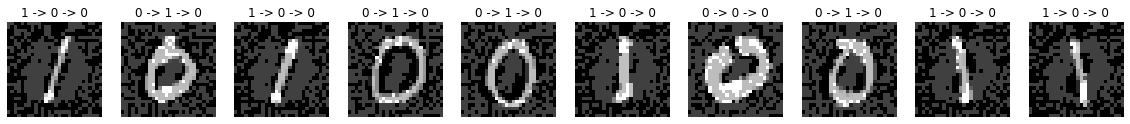

In [66]:
re_test_labels = tf.cast(re_test_labels, tf.int64)
# Tester dans les différentes valeurs d'epsilon 
epsilons = [0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.4,0.45,0.5]
adv_acc_list = []
adv_acc_list_L1 = []
for i, eps in enumerate(epsilons):
  print("epsilons = {}:".format(eps))
  # Le résultat de la prédiction de l'image d'origine 
  re_test_image = tf.clip_by_value(re_test_image, -1, 1)
  predict_label = model.predict(re_test_image)
  predict_label = np.array([np.argmax(i) for i in predict_label])
  # Génération des adversarial pattern et obtenir des résultats de prédiction 
  adv_image = re_test_image + eps*perturbations
  adv_image = tf.clip_by_value(adv_image, -1, 1)
  adv_predict_label = model.predict(adv_image)
  adv_predict_label = np.array([np.argmax(i) for i in adv_predict_label])

  adv_predict_label_L1 = model_L1.predict(adv_image)
  adv_predict_label_L1 = np.array([np.argmax(i) for i in adv_predict_label_L1])

  # Évaluer le modèle sur un ensemble d'exemples adversarial
  score = model.evaluate(adv_image,re_test_labels,verbose=0 )
  adv_acc_list.append(score[1])

  score_L1 = model_L1.evaluate(adv_image,re_test_labels,verbose=0)
  adv_acc_list_L1.append(score_L1[1])

  # plot
  display_images(adv_image,predict_label,adv_predict_label, adv_predict_label_L1, 10)

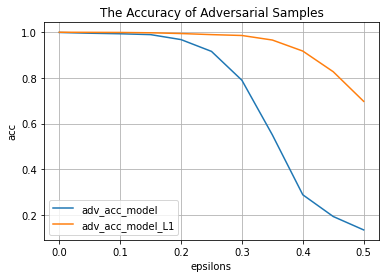

adv_acc_model [0.99858158826828, 0.9952718615531921, 0.9929078221321106, 0.9891253113746643, 0.9673758745193481, 0.9158392548561096, 0.7895981073379517, 0.5508274435997009, 0.2888889014720917, 0.19385342299938202, 0.1352245807647705]
adv_acc_model_L1 [0.9995272159576416, 0.9990543723106384, 0.99858158826828, 0.9971631169319153, 0.9938534498214722, 0.9891253113746643, 0.985342800617218, 0.965484619140625, 0.9172576665878296, 0.8269503712654114, 0.6973995566368103]


In [67]:
plt.title("The Accuracy of Adversarial Samples")
plt.xlabel("epsilons")
plt.ylabel("acc")
plt.plot(epsilons,adv_acc_list,label='adv_acc_model')
plt.plot(epsilons,adv_acc_list_L1,label='adv_acc_model_L1')
plt.legend()
plt.grid()
plt.show()
print('adv_acc_model',adv_acc_list)
print('adv_acc_model_L1',adv_acc_list_L1)

##5. L’entraînement contradictoire avec la base de données qui est ajoutée les exemples contradictoires.



#### 5.1 Ajouter les perturbation dans la base de données

In [56]:
perturb = create_adversarial_pattern(re_train_image, re_train_labels)
train_adv = re_train_image+0.3*perturb
train_train_adv = tf.concat([re_train_image, train_adv], 0) 
labels_label_adv = tf.concat([re_train_labels, re_train_labels], 0) 

dataset_adv = tf.data.Dataset.from_tensor_slices((train_train_adv, labels_label_adv)).shuffle(12665).batch(128)
test_dataset = tf.data.Dataset.from_tensor_slices((re_test_image, re_test_labels)).batch(256)

In [58]:
model_adv =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='sigmoid', name='dense_1'),
    tf.keras.layers.Dense(10, activation='sigmoid', name='dense_3')
])
optimizer_adv = tf.keras.optimizers.Adam()
loss_func_adv = tf.keras.losses.SparseCategoricalCrossentropy()
model_adv.compile(optimizer=optimizer,loss=loss_func_adv,metrics=['acc'])
history = model_adv.fit(dataset_adv,validation_data=test_dataset,epochs=10)

Epoch 1/10
198/198 [==============================] - 2s 5ms/step - loss: 0.0377 - acc: 0.9909 - val_loss: 0.0039 - val_acc: 0.9995
Epoch 2/10
198/198 [==============================] - 1s 4ms/step - loss: 0.0037 - acc: 0.9991 - val_loss: 0.0028 - val_acc: 0.9991
Epoch 3/10
198/198 [==============================] - 1s 5ms/step - loss: 0.0024 - acc: 0.9994 - val_loss: 0.0027 - val_acc: 0.9991
Epoch 4/10
198/198 [==============================] - 1s 4ms/step - loss: 0.0016 - acc: 0.9996 - val_loss: 0.0026 - val_acc: 0.9986
Epoch 5/10
198/198 [==============================] - 1s 4ms/step - loss: 0.0015 - acc: 0.9997 - val_loss: 0.0032 - val_acc: 0.9991
Epoch 6/10
198/198 [==============================] - 1s 4ms/step - loss: 0.0016 - acc: 0.9996 - val_loss: 0.0021 - val_acc: 0.9991
Epoch 7/10
198/198 [==============================] - 1s 4ms/step - loss: 9.6112e-04 - acc: 0.9998 - val_loss: 0.0068 - val_acc: 0.9981
Epoch 8/10
198/198 [==============================] - 1s 4ms/step - loss

epsilons = 0:
67/67 [==============================] - 0s 2ms/step


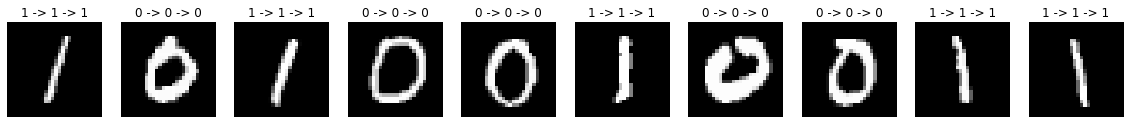

epsilons = 0.05:
67/67 [==============================] - 0s 2ms/step


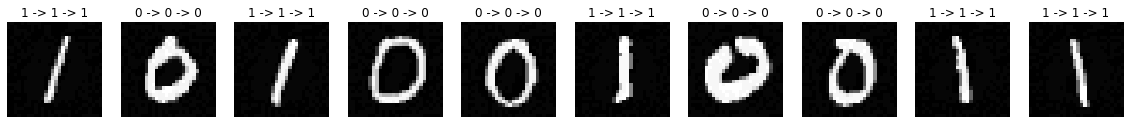

epsilons = 0.1:
67/67 [==============================] - 0s 2ms/step


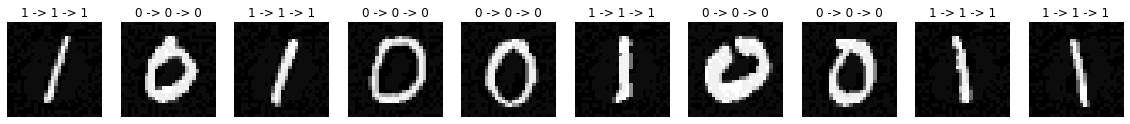

epsilons = 0.15:
67/67 [==============================] - 0s 2ms/step


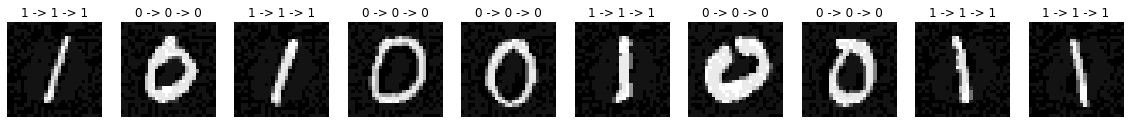

epsilons = 0.2:
67/67 [==============================] - 0s 2ms/step


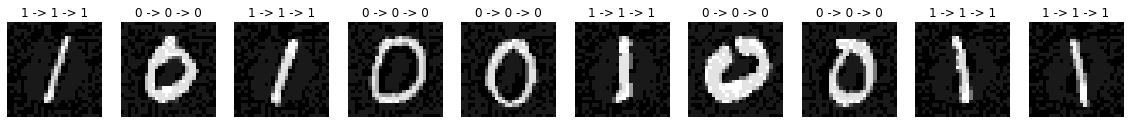

epsilons = 0.25:
67/67 [==============================] - 0s 1ms/step


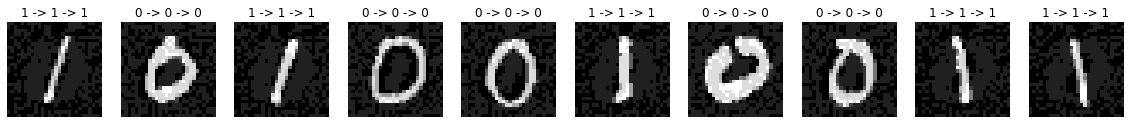

epsilons = 0.3:
67/67 [==============================] - 0s 1ms/step


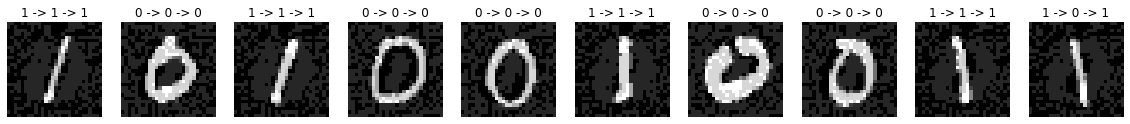

epsilons = 0.35:
67/67 [==============================] - 0s 2ms/step


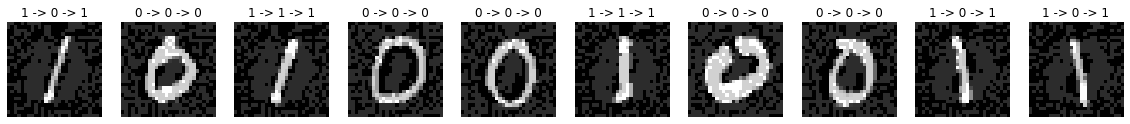

epsilons = 0.4:
67/67 [==============================] - 0s 2ms/step


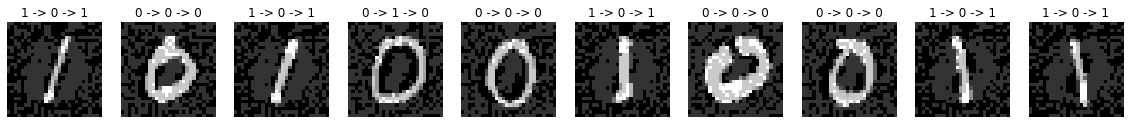

epsilons = 0.45:
67/67 [==============================] - 0s 1ms/step


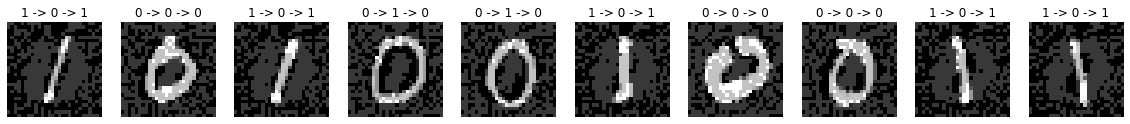

epsilons = 0.5:
67/67 [==============================] - 0s 2ms/step


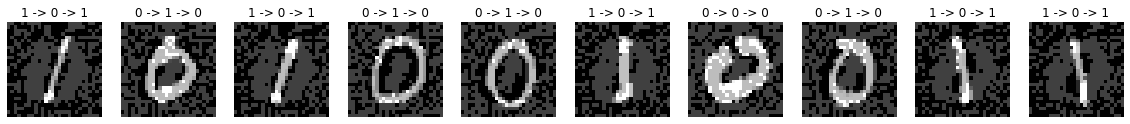

In [63]:
# Tester dans les différentes valeurs d'epsilon 在不同的epsilons进行测试
epsilons = [0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.4,0.45,0.5]
adv_acc_list = []
acc_list = []
for i, eps in enumerate(epsilons):
  print("epsilons = {}:".format(eps))
  # Générer des adversarial pattern
  adv_image = re_test_image + eps*perturbations      
  adv_image = tf.clip_by_value(adv_image, -1, 1)
  # Obtenir le résultat de la prédiction de l'image d'origine 
  pred = model.predict(re_test_image) 
  pred = np.array([np.argmax(i) for i in pred])
  # Obtenir le résultat de la prédiction de adversarial exemples en utilisant model original
  pred_adv1 = model.predict(adv_image) 
  pred_adv1 = np.array([np.argmax(i) for i in pred_adv1])
  # Obtenir le résultat de la prédiction de adversarial exemples en utilisant model avec adversarial training 
  pred_adv2 = model_adv.predict(adv_image)
  pred_adv2 = np.array([np.argmax(i) for i in pred_adv2])
  # Évaluer le modèle sur un ensemble d'exemples adversarial 
  score1 = model.evaluate(adv_image,re_test_labels,verbose=0)
  acc_list.append(score1[1])
  score2 = model_adv.evaluate(adv_image,re_test_labels,verbose=0)
  adv_acc_list.append(score2[1])
  # plot
  display_images(adv_image,pred,pred_adv1,pred_adv2, 10)

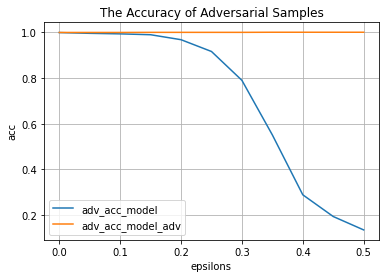

acc [0.99858158826828, 0.9952718615531921, 0.9929078221321106, 0.9891253113746643, 0.9673758745193481, 0.9158392548561096, 0.7895981073379517, 0.5508274435997009, 0.2888889014720917, 0.19385342299938202, 0.1352245807647705]
acc [0.9990543723106384, 0.9990543723106384, 0.9990543723106384, 0.9995272159576416, 0.9995272159576416, 0.9995272159576416, 0.9995272159576416, 1.0, 1.0, 1.0, 1.0]


In [65]:
plt.figure()
plt.plot(epsilons,acc_list,label='adv_acc_model')
plt.plot(epsilons,adv_acc_list,label='adv_acc_model_adv')
plt.title("The Accuracy of Adversarial Samples")
plt.xlabel("epsilons")
plt.ylabel("acc")
plt.legend()
plt.grid()
plt.show()
print('acc',acc_list)
print('acc',adv_acc_list)